In [2]:
import pandas as pd 

#### Analysis of data quality

In [6]:
simfin_income = pd.read_csv("../simfin_data/us-balance-annual.csv", sep=";")

In [7]:
simfin_income.Ticker.value_counts()

Ticker
SPTN     6
A        5
MERC     5
META     5
METC     5
        ..
KD       1
CLUBQ    1
OCSL     1
OCLN     1
MICR     1
Name: count, Length: 4401, dtype: int64

In [8]:
# Group by 'Ticker' and filter groups with no NaN values in any row
companies_with_no_nans = simfin_income.groupby('Ticker').filter(
    lambda group: not group.isnull().any().any()
)

# Extract unique tickers
unique_tickers = companies_with_no_nans['Ticker'].unique()

print("Tickers with no NaNs across all rows:")
print(unique_tickers)


Tickers with no NaNs across all rows:
['ABBV' 'ABT' 'AGR' 'ALKS' 'AMAT' 'AME' 'ARCH' 'ATR' 'BA' 'BC' 'BIO'
 'BKTI' 'BLBD' 'BTU' 'BWA' 'CAAS' 'CASI' 'CAT' 'CBAT' 'CNLPL' 'CONN' 'COP'
 'CPA' 'CPK' 'CSV' 'CTAS' 'CVS' 'CVX' 'CY' 'DAL' 'DBD' 'DELL' 'DGX' 'DIS'
 'DK' 'DLA' 'DLTH' 'DOW' 'EAI' 'EMP' 'EW' 'FMC' 'GE' 'GTLS' 'HAIN' 'HMC'
 'HOG' 'HON' 'IBM' 'IP' 'IVAC' 'JBLU' 'KNF' 'KO' 'KOPN' 'LFUS' 'LIVN'
 'LKQ' 'LLY' 'LYB' 'MDLZ' 'MDU' 'MELI' 'MGLN' 'MPC' 'MRK' 'MU' 'NAV' 'NEM'
 'NI' 'OMC' 'OMCL' 'OPK' 'PFE' 'PFIE' 'PH' 'PM' 'POST' 'PPG' 'PSMT' 'PSX'
 'RDWR' 'REX' 'ROK' 'SCCO' 'SCL' 'SJI' 'SRI' 'SRNE' 'STRR' 'STZ' 'TBTC'
 'TEN' 'THC' 'TM' 'TMX' 'TSE' 'UHAL' 'UNP' 'VATE' 'VHI' 'VICR' 'VIVK'
 'VOXX' 'VST' 'WBA' 'WEN' 'WMB' 'X' 'XOM']


#### Analysis of how many entries per comapyn

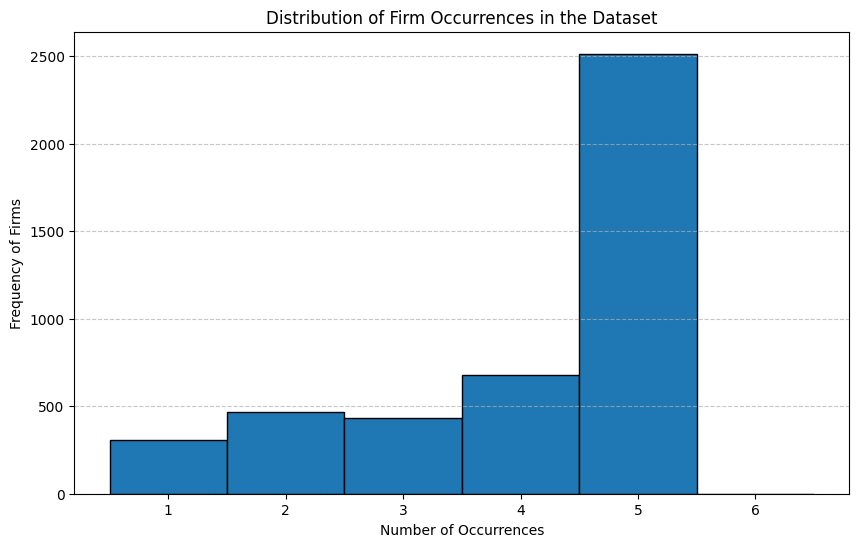

In [9]:
import matplotlib.pyplot as plt

# Assuming the Ticker counts are already calculated as a Series
ticker_counts = simfin_income['Ticker'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(ticker_counts, bins=range(1, ticker_counts.max() + 2), edgecolor='black', align='left')
plt.title("Distribution of Firm Occurrences in the Dataset")
plt.xlabel("Number of Occurrences")
plt.ylabel("Frequency of Firms")
plt.xticks(range(1, ticker_counts.max() + 1))  # Set x-ticks for each occurrence count
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
# Count occurrences of each Ticker
ticker_counts = simfin_income['Ticker'].value_counts()

# Identify Tickers that occur exactly 5 times
tickers_with_5_occurrences = ticker_counts[ticker_counts == 5].index

# Filter the dataset for these Tickers
filtered_dataset = simfin_income[simfin_income['Ticker'].isin(tickers_with_5_occurrences)]

# Display the filtered dataset
print(filtered_dataset)


      Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0          A     45846      USD         2019            Q4  2019-10-31   
1          A     45846      USD         2020            Q4  2020-10-31   
2          A     45846      USD         2021            Q4  2021-10-31   
3          A     45846      USD         2022            Q4  2022-10-31   
4          A     45846      USD         2023            Q4  2023-10-31   
...      ...       ...      ...          ...           ...         ...   
17821   ZYXI    171401      USD         2019            Q4  2019-12-31   
17822   ZYXI    171401      USD         2020            Q4  2020-12-31   
17823   ZYXI    171401      USD         2021            Q4  2021-12-31   
17824   ZYXI    171401      USD         2022            Q4  2022-12-31   
17825   ZYXI    171401      USD         2023            Q4  2023-12-31   

      Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0       2019-12-19    2020-12-18    

#### Fill Nans

In [11]:
# Select quantitative columns (numeric types)
quantitative_columns = filtered_dataset.select_dtypes(include=['number']).columns

# Fill NaN values in quantitative columns with the column mean (or another method like median)
filtered_dataset[quantitative_columns] = filtered_dataset[quantitative_columns].apply(lambda col: col.fillna(col.mean()))

# Display the updated dataset
print(filtered_dataset)


      Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0          A     45846      USD         2019            Q4  2019-10-31   
1          A     45846      USD         2020            Q4  2020-10-31   
2          A     45846      USD         2021            Q4  2021-10-31   
3          A     45846      USD         2022            Q4  2022-10-31   
4          A     45846      USD         2023            Q4  2023-10-31   
...      ...       ...      ...          ...           ...         ...   
17821   ZYXI    171401      USD         2019            Q4  2019-12-31   
17822   ZYXI    171401      USD         2020            Q4  2020-12-31   
17823   ZYXI    171401      USD         2021            Q4  2021-12-31   
17824   ZYXI    171401      USD         2022            Q4  2022-12-31   
17825   ZYXI    171401      USD         2023            Q4  2023-12-31   

      Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0       2019-12-19    2020-12-18    

/var/folders/g1/cbg0y1nj55v4p3lfbkx_dcdh0000gn/T/ipykernel_2037/237202272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset[quantitative_columns] = filtered_dataset[quantitative_columns].apply(lambda col: col.fillna(col.mean()))


In [12]:
filtered_dataset

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,45846,USD,2019,Q4,2019-10-31,2019-12-19,2020-12-18,314000000.0,318000000.0,...,6.160000e+08,2.080000e+09,1.791000e+09,2.624000e+09,4.704000e+09,5.280000e+09,-3.234536e+09,-1.800000e+07,4748000000,9452000000
1,A,45846,USD,2020,Q4,2020-10-31,2020-12-18,2021-12-17,309000000.0,312000000.0,...,7.500000e+07,1.467000e+09,2.284000e+09,3.287000e+09,4.754000e+09,5.314000e+09,-3.234536e+09,8.100000e+07,4873000000,9627000000
2,A,45846,USD,2021,Q4,2021-10-31,2021-12-17,2022-12-21,305000000.0,307000000.0,...,4.720225e+08,1.708000e+09,2.729000e+09,3.608000e+09,5.316000e+09,5.323000e+09,-3.234536e+09,3.480000e+08,5389000000,10705000000
3,A,45846,USD,2022,Q4,2022-10-31,2022-12-21,2023-12-20,304000000.0,307000000.0,...,3.600000e+07,1.861000e+09,2.733000e+09,3.366000e+09,5.227000e+09,5.328000e+09,-3.234536e+09,3.240000e+08,5305000000,10532000000
4,A,45846,USD,2023,Q4,2023-10-31,2023-12-20,2024-12-20,294000000.0,296000000.0,...,4.720225e+08,1.603000e+09,2.735000e+09,3.315000e+09,4.918000e+09,5.390000e+09,-3.234536e+09,7.820000e+08,5845000000,10763000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,ZYXI,171401,USD,2019,Q4,2019-12-31,2020-02-27,2021-02-25,35682900.0,37359300.0,...,1.257562e+06,5.197000e+06,3.426242e+06,3.427000e+06,8.624000e+06,9.232000e+06,-3.846000e+06,1.435600e+07,19653000,28277000
17822,ZYXI,171401,USD,2020,Q4,2020-12-31,2021-02-25,2022-03-22,37255900.0,38437300.0,...,2.129516e+06,1.011700e+07,5.209910e+06,5.203000e+06,1.532000e+07,3.723500e+07,-3.846000e+06,2.343000e+07,56855000,72175000
17823,ZYXI,171401,USD,2021,Q4,2021-12-31,2022-03-22,2023-03-14,37255900.0,38437300.0,...,8.311054e+06,2.287100e+07,2.684306e+07,3.647800e+07,5.934900e+07,8.043800e+07,-6.513000e+06,2.337485e+09,73925000,133274000
17824,ZYXI,171401,USD,2022,Q4,2022-12-31,2023-03-14,2024-03-12,38467000.0,39127000.0,...,7.920947e+06,2.108600e+07,1.899776e+07,2.902200e+07,5.010800e+07,8.247000e+07,-3.316000e+07,1.704800e+07,66358000,116466000


In [13]:
# Count remaining NaN values per column
remaining_nans = filtered_dataset.isnull().sum()

# Display columns with remaining NaN values
print(remaining_nans[remaining_nans > 0])


Series([], dtype: int64)


In [14]:
# Select date-related columns
date_columns = ['Fiscal Year', 'Fiscal Period', 'Report Date', 'Publish Date', 'Restated Date']

# Check for missing or inconsistent date patterns within each company
date_issues = {}

for ticker, group in filtered_dataset.groupby('Ticker'):
    date_summary = group[date_columns].agg(['min', 'max', 'nunique'])
    date_issues[ticker] = date_summary

# Display inconsistencies if any
for ticker, summary in date_issues.items():
    print(f"Ticker: {ticker}")
    print(summary)
    print("-" * 40)


Ticker: A
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            Q4  2019-10-31   2019-12-19    2020-12-18
max             2023            Q4  2023-10-31   2023-12-20    2024-12-20
nunique            5             1           5            5             5
----------------------------------------
Ticker: AA
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            Q4  2019-12-31   2020-02-21    2021-02-25
max             2023            Q4  2023-12-31   2024-02-21    2024-10-31
nunique            5             1           5            5             5
----------------------------------------
Ticker: AAGH
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            Q4  2019-06-30   2021-03-23    2021-07-13
max             2023            Q4  2023-06-30   2023-10-13    2024-06-03
nunique            5             1           5            5           

In [15]:
# Ensure 'Report Date' is a datetime object
filtered_dataset['Report Date'] = pd.to_datetime(filtered_dataset['Report Date'])

# Filter for companies reporting on 12-31
filtered_dataset = filtered_dataset[filtered_dataset['Report Date'].dt.month == 12]
filtered_dataset = filtered_dataset[filtered_dataset['Report Date'].dt.day == 31]

/var/folders/g1/cbg0y1nj55v4p3lfbkx_dcdh0000gn/T/ipykernel_2037/163780779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Report Date'] = pd.to_datetime(filtered_dataset['Report Date'])


In [16]:
filtered_dataset["Report Date"].dt.month.value_counts()

Report Date
12    9798
Name: count, dtype: int64

In [17]:
filtered_dataset["Report Date"].dt.year.value_counts()

Report Date
2020    1960
2021    1960
2022    1960
2023    1960
2019    1958
Name: count, dtype: int64

In [18]:
filtered_dataset.columns

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

In [19]:
# List of columns to drop
columns_to_remove = [
    'SimFinId',        # Likely redundant
    'Currency',        # If all entries use the same currency
    'Fiscal Period',   # If working with only annual data (FY)
    'Publish Date',    # Less relevant for financial analysis
    'Restated Date',   # Less relevant for financial analysis
    'Shares (Basic)',  # Not needed if not calculating per-share metrics
    'Shares (Diluted)' # Same as above
]

# Drop the columns from the dataset
simplified_dataset = filtered_dataset.drop(columns=columns_to_remove, errors='ignore')

# Display the simplified dataset
print(simplified_dataset)


      Ticker  Fiscal Year Report Date  \
7         AA         2019  2019-12-31   
8         AA         2020  2020-12-31   
9         AA         2021  2021-12-31   
10        AA         2022  2022-12-31   
11        AA         2023  2023-12-31   
...      ...          ...         ...   
17821   ZYXI         2019  2019-12-31   
17822   ZYXI         2020  2020-12-31   
17823   ZYXI         2021  2021-12-31   
17824   ZYXI         2022  2022-12-31   
17825   ZYXI         2023  2023-12-31   

       Cash, Cash Equivalents & Short Term Investments  \
7                                         8.790000e+08   
8                                         1.607000e+09   
9                                         1.814000e+09   
10                                        1.363000e+09   
11                                        9.440000e+08   
...                                                ...   
17821                                     1.404000e+07   
17822                                     3

In [20]:
len(simplified_dataset.columns)

23

In [21]:
simplified_dataset.to_csv("../app/backend/data/balance_data_2020_2023.csv")